<a href="https://colab.research.google.com/github/applesyeda/sales-predictions/blob/main/Project_1_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Uploading my data 
import pandas as pd
df = pd.read_csv('/content/sales_predictions.csv')

In [2]:
#Mouting my data 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Uploading my libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
#Checking the first 5 rows of my data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Assessing variable types and missing data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#Seeing how many missing values per variable 
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

I can see above that the only variables with missing data are Item_Weight and Outlet_Size. I have chosen to drop these two columns because I don't see that they would be nessesary in my dataset. My goal is to assess for changes in sales, and see what companies can do if variables contributig to those changes can be idenified. However, if the weight of an item was a predictor of how much money would be made in sales, retail stores wouldn't nessarily have the power to change the weight of an item. Nor could they change the size of their store. Plus, I can also use the outlet type variable, that has no missing values, could be used instead to see if sale increases are associated with that, which may also account for the size of the retailer.  That being said, I think it's reasonable to drop the Item Weight and Outlet Size columns. 

In [7]:
#Dropping the Item Weight column
df.drop(columns="Item_Weight", inplace=True)
#Dropping the Outlet Size column
df.drop(columns="Outlet_Size", inplace=True)

In [8]:
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
#Checking the data
df.sample(5)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1762,DRN47,Low Fat,0.016853,Hard Drinks,180.6660,OUT049,1999,Tier 1,Supermarket Type1,2876.2560
4459,NCL53,Low Fat,0.036228,Health and Hygiene,175.2028,OUT035,2004,Tier 2,Supermarket Type1,4427.5700
5574,FDC33,Regular,0.068925,Fruits and Vegetables,196.9768,OUT035,2004,Tier 2,Supermarket Type1,2759.0752
4933,DRM35,LF,0.070587,Hard Drinks,176.9344,OUT045,2002,Tier 2,Supermarket Type1,5888.3352
7392,FDW50,Low Fat,0.076006,Dairy,166.1158,OUT017,2007,Tier 2,Supermarket Type1,1169.8106


Now I will find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

In [11]:
df.nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
# Standardize the values in the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    3006
LF          316
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [18]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [19]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Now I am curious to see how purchases in snacks have changed throughout the years. I think there's a greater emphasis in health consiousness when it comes to snacks because we have a societal reputation for being unhealthy. That being said, maybe snack foods labelled as low fat have increased sales throughout the years. So I created a new dataframe with only snack foods and created the graph below to show the relationship between their sales revenue throughout the years. I see that there was definately a large dip between 1995 and 2000, so that could lead to further investagation on what could have happened. There could have been an economic collapse that badly hurt the food retail industry to lesser production of snack foods for political reasons. However, we can see that low fat snack foods have had a consistenly greater range in sales throughout the years as well as the average of those snack sales being generally greater compared to non-low fat or regular snack foods. Seeing these trends over the years may encourage food retailers to continue investing time and marketing into low fat products to appeal to the health consiousness of their consumers. 


Reference: https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn

In [44]:
snacks_only_filter = df["Item_Type"] == "Snack Foods"
df[snacks_only_filter]

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6,FDO10,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528
7,FDP10,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Tier 3,Supermarket Type3,4022.7636
13,FDS46,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Tier 1,Supermarket Type1,2145.2076
20,FDN22,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,Tier 3,Supermarket Type1,3775.0860
26,FDV10,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Tier 2,Supermarket Type1,1065.2800
...,...,...,...,...,...,...,...,...,...,...
8501,FDW21,Regular,0.005998,Snack Foods,100.4358,OUT017,2007,Tier 2,Supermarket Type1,1508.0370
8505,FDB46,Regular,0.094146,Snack Foods,210.8244,OUT018,2009,Tier 3,Supermarket Type2,2117.2440
8510,FDN58,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Tier 2,Supermarket Type1,7182.6504
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834


In [46]:
df2 = df.loc[snacks_only_filter, :]
df2['Item_Type'].value_counts()

Snack Foods    1200
Name: Item_Type, dtype: int64

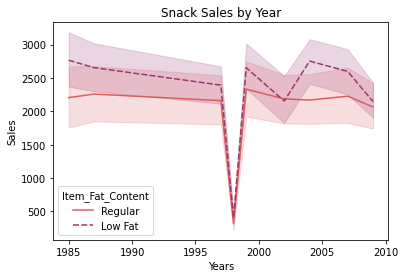

In [58]:
ax = sns.lineplot(data=df2, x='Outlet_Establishment_Year', 
   y="Item_Outlet_Sales", hue='Item_Fat_Content', 
   style="Item_Fat_Content", palette="flare");

plt.title('Snack Sales by Year');
# Set x-axis label
plt.xlabel('Years');
# Set y-axis label
plt.ylabel('Sales');


The below graph is very interesting because it shows that as Item MRP increases, so does the sales revenue. This is different than a typical bar graph as it also shows how many data points there are per sale and item MRP (even more so as I played around a lot with the size and dimensions). Therefore, I think the higher the Item MRP, the greater room there is for the range of sales and possible outliers that then increase that range. For instance, by just eye-balling it, it doesn't seem like there are as many items with a MRP of 250, but it still holds the greatest range in sales revenue. Therefore, it may be worth it for retailers to further invest in MRP and continue to assess for changes in sales revenue. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


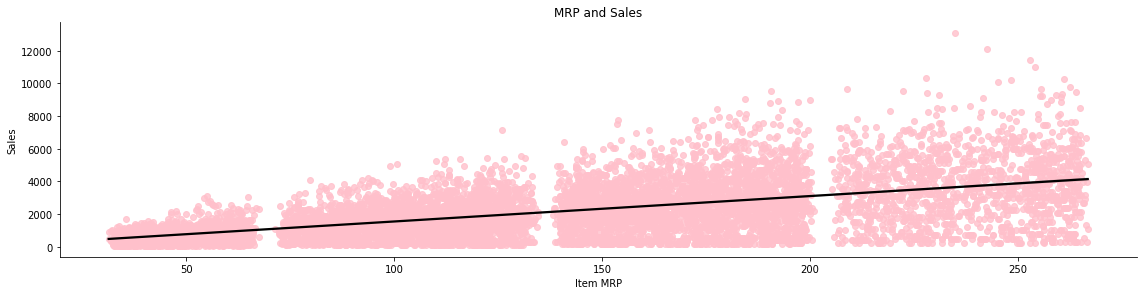

In [81]:
ax = sns.lmplot('Item_MRP', # Horizontal axis
           'Item_Outlet_Sales', # Vertical axis
           data=df, # Data source
           fit_reg=True,
          scatter_kws={"color": "pink"}, 
          line_kws={"color": "black"}, # Do fix a regression line
           height = 4,
           aspect =4 ); # size and dimension


plt.title('MRP and Sales');
# Set x-axis label
plt.xlabel('Item MRP');
# Set y-axis label
plt.ylabel('Sales');

